# Identifying Patient Cohorts in [MIMIC-II](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3124312/)


In [1]:
%matplotlib inline

In [2]:
import pymysql
import pandas as pd
import getpass
import pandas as pd
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt

In [3]:
conn = pymysql.connect(host="mysql",
                       port=3306,user="jovyan",
                       passwd=getpass.getpass("Enter MySQL passwd for jovyan"),db='mimic2')
cursor = conn.cursor()

Enter MySQL passwd for jovyan········


In [4]:
mimic2Adm = pd.read_sql("""SELECT * FROM admissions LIMIT 100""", conn)

In [5]:
mimic2Adm.head()

,hadm_id,subject_id,admit_dt,disch_dt
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00


## Exercise: Create a Histogram of the length of stay for subjects in the database

In [6]:
mimic2Adm["LOS"] = mimic2Adm.apply(lambda row: (row["disch_dt"] - row["admit_dt"]).days, axis = 1)
mimic2Adm.head()

,hadm_id,subject_id,admit_dt,disch_dt,LOS
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00,6
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00,11
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00,13
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00,9
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00,13


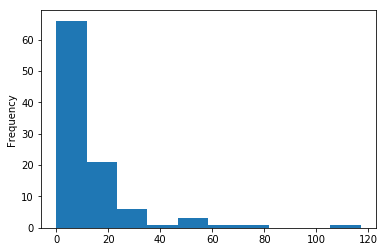

In [7]:
mimic2Adm.LOS.plot.hist()

In [8]:
mimic2Adm.LOS.describe()

count    100.000000
mean      13.490000
std       17.103071
min        0.000000
25%        4.000000
50%        8.000000
75%       16.000000
max      117.000000
Name: LOS, dtype: float64

## Exercise: Create a histogram of the day of the week when patients are admitted

In [18]:
mimic2Adm["AdmDaysOnWeek"] = mimic2Adm.apply(lambda row: int(time.strftime("%w", row["admit_dt"].timetuple())), axis = 1)

In [19]:
mimic2Adm.head()

,hadm_id,subject_id,admit_dt,disch_dt,LOS,AdmDaysOnWeek
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00,6,3
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00,11,4
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00,13,6
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00,9,0
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00,13,4


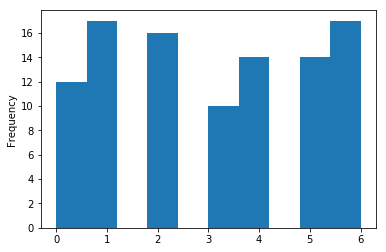

In [22]:
mimic2Adm.AdmDaysOnWeek.plot.hist()

In [23]:
mimic2Adm.AdmDaysOnWeek.describe()

count    100.000000
mean       3.070000
std        2.046209
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: AdmDaysOnWeek, dtype: float64